In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma

from metpy.cbook import get_test_data
from metpy.io.nexrad import Level2File
from metpy.plots import ctables

%matplotlib inline

In [2]:
# Open the file
name = get_test_data('KTLX20130520_201643_V06.gz', as_file_obj=False)
f = Level2File(name)

In [3]:
f.sweeps[0][0]

(Msg31DataHdr(stid=b'KTLX', time_ms=73003850, date=15846, az_num=1, az_angle=123.20343017578125, compression=0, rad_length=6856, az_spacing=1, rad_status=5, el_num=1, sector_num=1, el_angle=0.5987548828125, spot_blanking=None, az_index_mode=0.25, num_data_blks=7, vol_const_ptr=68, el_const_ptr=112, rad_const_ptr=124),
 VolConsts(type=b'R', name=b'VOL', size=44, major=1, minor=0, lat=35.33305740356445, lon=-97.27748107910156, site_amsl=369, feedhorn_agl=19, calib_dbz=-43.72919845581055, txpower_h=185.05685424804688, txpower_v=181.45559692382812, sys_zdr=-0.08510557562112808, phidp0=25.0, vcp=12, processing_status=None),
 ElConsts(type=b'R', name=b'ELV', size=12, atmos_atten=-0.012, calib_dbz0=-42.4375),
 RadConstsV1(type=b'R', name=b'RAD', size=20, unamb_range=466.0, noise_h=-79.71426391601562, noise_v=-79.39848327636719, nyq_vel=8.3),
 {b'PHI': (DataBlockHdr(type=b'D', name=b'PHI', reserved=0, num_gates=1192, first_gate=2.125, gate_width=0.25, tover=5.0, snr_thresh=1.6, recombined=None

In [4]:
# Pull data out of the file
sweep = 0

# First item in ray is header, which has azimuth angle
az = np.array([ray[0].az_angle for ray in f.sweeps[sweep]])

# 5th item is a dict mapping a var name (byte string) to a tuple
# of (header, data array)
ref_hdr = f.sweeps[sweep][0][4][b'REF'][0]
ref_range = np.arange(ref_hdr.num_gates) * ref_hdr.gate_width + ref_hdr.first_gate
ref = np.array([ray[4][b'REF'][1] for ray in f.sweeps[sweep]])

rho_hdr = f.sweeps[sweep][0][4][b'RHO'][0]
rho_range = (np.arange(rho_hdr.num_gates + 1) - 0.5) * rho_hdr.gate_width + rho_hdr.first_gate
rho = np.array([ray[4][b'RHO'][1] for ray in f.sweeps[sweep]])

/Users/jleeman/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


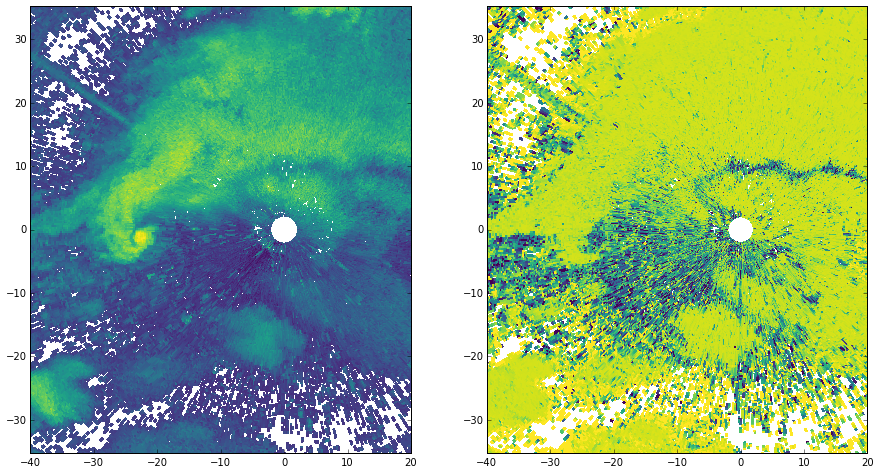

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
for var_data, var_range, ax in zip((ref, rho), (ref_range, rho_range), axes):
    # Turn into an array, then mask
    data = ma.array(var_data)
    data[np.isnan(data)] = ma.masked

    # Convert az,range to x,y
    xlocs = var_range * np.sin(np.deg2rad(az[:, np.newaxis]))
    ylocs = var_range * np.cos(np.deg2rad(az[:, np.newaxis]))
   
    # Plot the data
    cmap = ctables.registry.get_colortable('viridis')
    ax.pcolormesh(xlocs, ylocs, data, cmap=cmap)
    ax.set_aspect('equal', 'datalim')
    ax.set_xlim(-40, 20)
    ax.set_ylim(-30, 30)

plt.show()